In [9]:
import lightgbm as lgb
import hyperopt as hp
from numpy.random import RandomState
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
"font.family": 'serif', # 衬线字体
"font.serif": ['SimSun'], # 宋体
"mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [2]:
train = pd.read_csv(filepath_or_buffer="../../Desktop/dataSet/g.csv",encoding='gbk')
train = pd.DataFrame(train)

In [3]:
train.columns

Index(['叶绿素a含量..mg/g.', '叶绿素b含量..mg/g.', '总叶绿素含量..mg/g.', '土壤含盐量..μS/cm.',
       '酶活性..U.', '露点温度..F.', '平均温度..F.', '站点气压.hPa..1000.', '海平面气压.hPa.',
       '能见度.mi.', '平均风速.knots.', '最大持续风速.knots.', '最大阵风.knots.', '最高气温..F.',
       '最低气温..F.', '降水量.in.'],
      dtype='object')

In [4]:
def  params_append(params):
    params['objective'] = 'regression'
    params['metric'] = 'rmse'
    params['feature_pre_filter']=False
    return params

In [5]:
def param_hyperopt(train):
    label = [f for f in train.columns if f in ['总叶绿素含量..mg/g.']]
    features = [f for f in train.columns if f not in ['叶绿素a含量..mg/g.', '叶绿素b含量..mg/g.', '总叶绿素含量..mg/g.']]
    train_data = lgb.Dataset(train[features],train[label],silent=True)
    def hyperopt_objective(params):
        params = params_append(params)
        print(params)
        res = lgb.cv(params,train_data,1000,nfold=2,stratified=False,shuffle=True,metrics='rmse',
                     early_stopping_rounds=20,verbose_eval=False,show_stdv=False)
        return min(res['rmse-mean'])
    #参数空间
    params_space = {
        'learning_rate': hp.hp.uniform('learning_rate',1e-2,5e-1),
        'bagging_fraction': hp.hp.uniform('bagging_fraction',0.5,1),
        'feature_fraction': hp.hp.uniform('feature_fraction',0.5,1),
        'num_leaves': hp.hp.choice('num_leaves',list(range(2,20,1))),
        'reg_alpha': hp.hp.randint('reg_alpha',0,10),
        'reg_lambda': hp.hp.uniform('reg_lambda',0,10),
        'bagging_freq': hp.hp.randint('bagging_freq',1,10),
        'min_child_samples': hp.hp.choice('min_child_samples',list(range(1,30,5)))
    }
    params_best = hp.fmin(
        hyperopt_objective,
        space=params_space,
        algo=hp.tpe.suggest,
        max_evals=300,
#         rstate=RandomState(2020)
    )
    return params_best

In [6]:
params = param_hyperopt(train)

{'bagging_fraction': 0.9090469522596505, 'bagging_freq': 1, 'feature_fraction': 0.9306292299494991, 'learning_rate': 0.10885794883419098, 'min_child_samples': 6, 'num_leaves': 12, 'reg_alpha': 4, 'reg_lambda': 4.5355560452337915, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50     

d:\python\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "

d:\python\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "

d:\python\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "



{'bagging_fraction': 0.7211922553709282, 'bagging_freq': 1, 'feature_fraction': 0.7677612773805246, 'learning_rate': 0.4340386245066481, 'min_child_samples': 26, 'num_leaves': 15, 'reg_alpha': 5, 'reg_lambda': 9.895378730047655, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                      

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.9972463633735018, 'bagging_freq': 4, 'feature_fraction': 0.7695976588708087, 'learning_rate': 0.2637137442986487, 'min_child_samples': 11, 'n

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5888530579842766, 'bagging_freq': 1, 'feature_fraction': 0.5086159072820238, 'learning_rate': 0.29112099437481326, 'min_child_samples': 6, 'num_leaves': 9, 'reg_alpha': 8, 'reg_lambda': 7.47229130962546, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wi

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5016535212389927, 'bagging_freq': 4, 'feature_fraction': 0.9696989027868029, 'learning_rate': 0.3431454175513441, 'min_child_samples': 1, 'num_leaves': 8, 'reg_alpha': 6, 'reg_lambda': 3.762351546392594, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.             
You can set `force_col_wise=true` to remo

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6754305639785622, 'bagging_freq': 4, 'feature_fraction': 0.8986824481550099, 'learning_rate': 0.0612298184824641, 'min_child_samples': 1, 'num_leaves': 6, 'reg_alpha': 3, 'reg_lambda': 3.891230613033109, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                        

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8575095329362048, 'bagging_freq': 4, 'feature_fraction': 0.940912075580814, 'learning_rate': 0.22590260190995734, 'min_child_samples': 11, 'num_leaves': 5, 'reg_alpha': 9, 'reg_lambda': 6.1970596157178175, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8473104903888764, 'bagging_freq': 4, 'feature_fraction': 0.9130765561869275, 'learning_rate': 0.2779181020238762, 'min_child_samples': 1, 'num_leaves': 6, 'reg_alpha': 3, 'reg_lambda': 0.6501856362733678, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.             
You can set `force_col_wise=true` to rem

{'bagging_fraction': 0.9772336716560355, 'bagging_freq': 1, 'feature_fraction': 0.7456825392635049, 'learning_rate': 0.243062075231941, 'min_child_samples': 1, 'num_leaves': 5, 'reg_alpha': 4, 'reg_lambda': 2.3366994303565307, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                        

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7740955753133749, 'bagging_freq': 4, 'feature_fraction': 0.6571371930810038, 'learning_rate': 0.2427937710399395, 'min_child_samples': 26, 'n

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8457445859482475, 'bagging_freq': 3, 'feature_fraction': 0.8156537089077178, 'learning_rate': 0.24066419723584861, 'min_child_samples': 1, 'num_leaves': 9, 'reg_alpha': 3, 'reg_lambda': 8.312496897608705, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-w

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.856366961955326, 'bagging_freq': 9, 'feature_fraction': 0.8882729339275887, 'learning_rate': 0.16283591753409205, 'min_child_samples': 1, 'num_leaves': 14, 'reg_alpha': 7, 'reg_lambda': 8.581620416621544, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.             
You can set `force_col_wise=true` to rem

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8685195935802998, 'bagging_freq': 5, 'feature_fraction': 0.7292308944914434, 'learning_rate': 0.3021833437806909, 'min_child_samples': 1, 'num_leaves': 5, 'reg_alpha': 0, 'reg_lambda': 7.611863274878758, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                        

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7845395351471306, 'bagging_freq': 8, 'feature_fraction': 0.9854115623090037, 'learning_rate': 0.2639064694574669, 'min_child_samples': 21, 'num_leaves': 3, 'reg_alpha': 8, 'reg_lambda': 7.1881575265715645, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13       

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.9845525717568224, 'bagging_freq': 9, 'feature_fraction': 0.89890270524389, 'learning_rate': 0.2852494671688596, 'min_child_samples': 1, 'num_leaves': 13, 'reg_alpha': 6, 'reg_lambda': 8.569718793089393, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wis

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.9124272360649079, 'bagging_freq': 5, 'feature_fraction': 0.6841185716080547, 'learning_rate': 0.23117424766994532, 'min_child_samples': 11, 'num_leaves': 5, 'reg_alpha': 3, 'reg_lambda': 7.386413806976198, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.             
You can set `force_col_wise=true` to re

{'bagging_fraction': 0.9010780347079014, 'bagging_freq': 4, 'feature_fraction': 0.7228006671795479, 'learning_rate': 0.15964217981775441, 'min_child_samples': 6, 'num_leaves': 14, 'reg_alpha': 0, 'reg_lambda': 8.315900290728992, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                      

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7471711946326284, 'bagging_freq': 2, 'feature_fraction': 0.9997347939551349, 'learning_rate': 0.11686754633400617, 'min_child_samples': 1, 'n

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.9230626774416195, 'bagging_freq': 7, 'feature_fraction': 0.9498808252950979, 'learning_rate': 0.196607523442006, 'min_child_samples': 16, 'num_leaves': 17, 'reg_alpha': 3, 'reg_lambda': 7.695868582322365, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-w

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7564206521521207, 'bagging_freq': 9, 'feature_fraction': 0.8909059817068908, 'learning_rate': 0.1705459300283641, 'min_child_samples': 26, 'num_leaves': 10, 'reg_alpha': 2, 'reg_lambda': 7.043508301982862, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.             
You can set `force_col_wise=true` to re

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.9170943264960644, 'bagging_freq': 5, 'feature_fraction': 0.5551731014816847, 'learning_rate': 0.22040751123800223, 'min_child_samples': 1, 'num_leaves': 15, 'reg_alpha': 1, 'reg_lambda': 8.33259802713889, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                       

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8159969089393574, 'bagging_freq': 3, 'feature_fraction': 0.911774395472164, 'learning_rate': 0.22999997149885987, 'min_child_samples': 1, 'num_leaves': 9, 'reg_alpha': 3, 'reg_lambda': 6.79767501147505, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wis

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7414169528848984, 'bagging_freq': 4, 'feature_fraction': 0.8999747806110092, 'learning_rate': 0.2753015766057522, 'min_child_samples': 1, 'num_leaves': 9, 'reg_alpha': 2, 'reg_lambda': 7.20824406811248, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.             
You can set `force_col_wise=true` to remov

{'bagging_fraction': 0.8773352734968991, 'bagging_freq': 6, 'feature_fraction': 0.7890729401424262, 'learning_rate': 0.1368919399923961, 'min_child_samples': 11, 'num_leaves': 4, 'reg_alpha': 1, 'reg_lambda': 5.872728115079489, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                       

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7555360119251827, 'bagging_freq': 3, 'feature_fraction': 0.942258633189015, 'learning_rate': 0.16566756416621975, 'min_child_samples': 1, 'nu

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8996979933112105, 'bagging_freq': 3, 'feature_fraction': 0.9992798133469054, 'learning_rate': 0.27098519593862314, 'min_child_samples': 1, 'num_leaves': 16, 'reg_alpha': 3, 'reg_lambda': 6.379926828984025, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.798260351463248, 'bagging_freq': 8, 'feature_fraction': 0.8243092226296312, 'learning_rate': 0.12078291102839435, 'min_child_samples': 1, 'num_leaves': 4, 'reg_alpha': 9, 'reg_lambda': 4.789844323844213, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.             
You can set `force_col_wise=true` to remo

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.8713120198119154, 'bagging_freq': 6, 'feature_fraction': 0.5924188882909476, 'learning_rate': 0.2282758640457772, 'min_child_samples': 11, 'num_leaves': 14, 'reg_alpha': 0, 'reg_lambda': 8.925638991472278, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                      

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6546225172254507, 'bagging_freq': 5, 'feature_fraction': 0.9698968156312658, 'learning_rate': 0.48199854357506133, 'min_child_samples': 1, 'num_leaves': 15, 'reg_alpha': 1, 'reg_lambda': 9.532192301207145, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6476476408415677, 'bagging_freq': 5, 'feature_fraction': 0.9986428549107779, 'learning_rate': 0.40669224194750975, 'min_child_samples': 1, 'num_leaves': 15, 'reg_alpha': 1, 'reg_lambda': 8.389399243151898, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.             
You can set `force_col_wise=true` to re

{'bagging_fraction': 0.5039843353363203, 'bagging_freq': 5, 'feature_fraction': 0.9326386884004699, 'learning_rate': 0.45846761070107384, 'min_child_samples': 1, 'num_leaves': 16, 'reg_alpha': 1, 'reg_lambda': 0.4537911562354857, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                     

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5627339132132821, 'bagging_freq': 5, 'feature_fraction': 0.957764754817762, 'learning_rate': 0.3672068510202291, 'min_child_samples': 1, 'num

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7356685184058904, 'bagging_freq': 1, 'feature_fraction': 0.9173837457008991, 'learning_rate': 0.414683203143288, 'min_child_samples': 21, 'num_leaves': 15, 'reg_alpha': 9, 'reg_lambda': 9.623369971853405, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-w

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7077748989257847, 'bagging_freq': 2, 'feature_fraction': 0.8625244124414073, 'learning_rate': 0.42242256998320826, 'min_child_samples': 1, 'num_leaves': 14, 'reg_alpha': 7, 'reg_lambda': 8.551217623196152, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.             
You can set `force_col_wise=true` to re

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6503678751761146, 'bagging_freq': 6, 'feature_fraction': 0.9387205300142619, 'learning_rate': 0.40369289646739037, 'min_child_samples': 6, 'num_leaves': 11, 'reg_alpha': 9, 'reg_lambda': 3.4195672504442847, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                     

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.7603390266649744, 'bagging_freq': 9, 'feature_fraction': 0.876623214593954, 'learning_rate': 0.45383404678533174, 'min_child_samples': 1, 'num_leaves': 10, 'reg_alpha': 5, 'reg_lambda': 8.615819779547023, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-w

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6620192508075761, 'bagging_freq': 7, 'feature_fraction': 0.9279900556584814, 'learning_rate': 0.48865702921120746, 'min_child_samples': 26, 'num_leaves': 14, 'reg_alpha': 6, 'reg_lambda': 1.4514904180588073, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.             
You can set `force_col_wise=true` to 

{'bagging_fraction': 0.6126638811411681, 'bagging_freq': 7, 'feature_fraction': 0.7832389971866542, 'learning_rate': 0.4660926586660984, 'min_child_samples': 1, 'num_leaves': 7, 'reg_alpha': 1, 'reg_lambda': 8.819220972971044, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                        

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5340304119315706, 'bagging_freq': 7, 'feature_fraction': 0.8273422418771678, 'learning_rate': 0.46415116239087395, 'min_child_samples': 1, 'n

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.680077182430233, 'bagging_freq': 7, 'feature_fraction': 0.8354425968596982, 'learning_rate': 0.4992491851314412, 'min_child_samples': 1, 'num_leaves': 7, 'reg_alpha': 9, 'reg_lambda': 8.32197010969171, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise

[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5400152676300096, 'bagging_freq': 6, 'feature_fraction': 0.8790763570075637, 'learning_rate': 0.29334311678832026, 'min_child_samples': 21, 'num_leaves': 14, 'reg_alpha': 7, 'reg_lambda': 9.793882068875655, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.             
You can set `force_col_wise=true` to r

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.6873257871483636, 'bagging_freq': 6, 'feature_fraction': 0.8336385227719908, 'learning_rate': 0.27183631608978454, 'min_child_samples': 26, 'num_leaves': 8, 'reg_alpha': 1, 'reg_lambda': 7.920222603681427, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                      

[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
{'bagging_fraction': 0.5446631784857738, 'bagging_freq': 4, 'feature_fraction': 0.8448922437120893, 'learning_rate': 0.41192257523343206, 'min_child_samples': 6, 'num_leaves': 17, 'reg_alpha': 7, 'reg_lambda': 9.438617027268553, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': False}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50                                                                                        
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 13                               
[LightGBM] [Warning] Auto-choosing col-

In [49]:
params

{'bagging_fraction': 0.8809122869046452,
 'bagging_freq': 5,
 'feature_fraction': 0.9207410035334165,
 'learning_rate': 0.34929189021440504,
 'min_child_samples': 0,
 'num_leaves': 10,
 'reg_alpha': 2,
 'reg_lambda': 1.1850266030934824}

In [7]:
ESR = 30
NBR = 10000
VBE = 50

evals_result = {}

params = params_append(params)
kf = sk.model_selection.KFold(n_splits=5,shuffle=True)
label = [f for f in train.columns if f in ['总叶绿素含量..mg/g.']]
features = [f for f in train.columns if f not in ['叶绿素a含量..mg/g.', '叶绿素b含量..mg/g.', '总叶绿素含量..mg/g.']]
for train_part_index,eval_index in kf.split(train[features],train[label]):
        eval = lgb.Dataset(train[features].loc[eval_index],train[label].loc[eval_index])
        train_part = lgb.Dataset(train[features].loc[train_part_index],train[label].loc[train_part_index])
        bst = lgb.train(params,train_part,num_boost_round=NBR,valid_sets=[train_part,eval],
                        evals_result=evals_result,
                valid_names=['train','valid'],early_stopping_rounds=ESR,verbose_eval=VBE)

d:\python\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\python\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\python\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future releas

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 7, number of used features: 13
[LightGBM] [Info] Start training from score 10.461803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

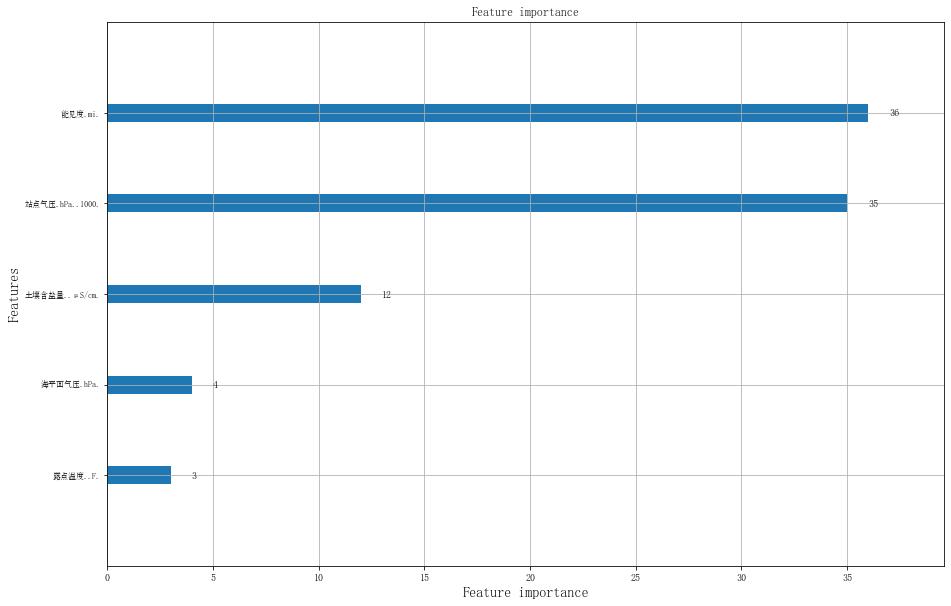

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
lgb.plot_importance(bst, max_num_features=20, ax=ax
                    #,importance_type='gain'
                   )
plt.yticks(fontsize=8)
plt.xlabel('Feature importance',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.savefig("feature importance.svg", format="svg")

Plotting metrics recorded during training...


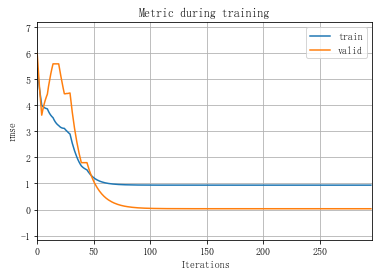

In [12]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.savefig("training progress.svg", format="svg")

Plotting 4th tree...


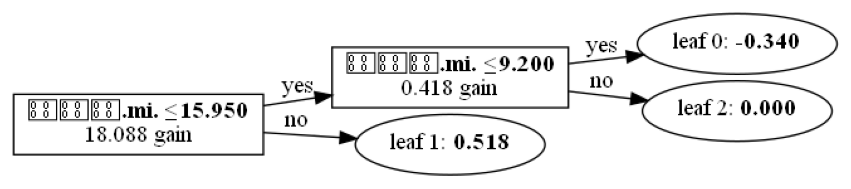

In [22]:
print('Plotting 4th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(bst, tree_index=4, figsize=(15, 15), show_info=['split_gain'])
plt.savefig("training tree.svg", format="svg")

Plotting split value histogram...


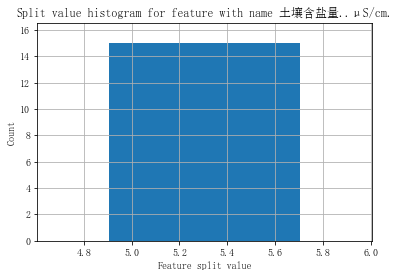

In [21]:
print('Plotting split value histogram...')
ax = lgb.plot_split_value_histogram(bst,feature='土壤含盐量..μS/cm.', bins='auto')
plt.savefig("training histogram.svg", format="svg")


In [46]:
def train_predict(train,test,params):
    label = 'illOrNot'
    features = [f for f in train.columns if f not in 'illOrNot']
    params = params_append(params)
    kf = sk.model_selection.KFold(n_splits=5,random_state=2020,shuffle=True)
    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    ESR = 30
    NBR = 10000
    VBE = 50
    for train_part_index,eval_index in kf.split(train[features],train[label]):
        train_part = lgb.Dataset(train[features].loc[train_part_index],train[label].loc[train_part_index])
        eval = lgb.Dataset(train[features].loc[eval_index],train[label].loc[eval_index])
        bst = lgb.train(params,train_part,num_boost_round=NBR,valid_sets=[train_part,eval],
                        valid_names=['train','valid'],early_stopping_rounds=ESR,verbose_eval=VBE)
        prediction_test += bst.predict(test[features])
        prediction_train = prediction_train.append(pd.Series(
        bst.predict(train[features].loc[eval_index]), index=eval_index))
        eval_pre = bst.predict(train[features].loc[eval_index])
        score = np.sqrt(sk.metrics.mean_absolute_error(train[label].loc[eval_index].values,eval_pre))
        cv_score.append(score)
        pd.Series(prediction_train.sort_index().values).to_csv(
        "../Desktop/train_lightgbm.csv",index = False)
        pd.Series(prediction_test).to_csv("../Desktop/test_lightgbm.csv",index=False)
        test['illOrNot'] = prediction_test
        test[['illOrNot']].to_csv("../Desktop/submission_lightgbm.csv",index=False)
        return

In [49]:
train_predict(train,test,params)

[LightGBM] [Info] Number of positive: 778, number of negative: 1542
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 2320, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335345 -> initscore=-0.684109
[LightGBM] [Info] Start training from score -0.684109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\86153\AppData\Local\Temp/ipykernel_14364/2901959919.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prediction_train = pd.Series()
d:\python\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\python\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
